<a href="https://colab.research.google.com/github/arinafil/Defense-predictor/blob/main/%D1%81%D1%80%D0%B0%D0%B2_defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt


#Defense predictor
–ë–µ—Ä–µ–º –ø–µ—Ä–≤—ã–µ —Ç—Ä–∏ –≥–µ–Ω–æ–º–∞. –î–∞–Ω–Ω—ã–µ –≤–∑—è—Ç—ã —Å —Å–µ—Ä–≤–µ—Ä–∞, –æ–Ω–∏ –±—ã–ª–∏ –ø—Ä–æ–∞–Ω–Ω–æ—Ç–∏—Ä–æ–≤–∞–Ω—ã prokka, –∞ –ø–æ—Å–ª–µ –ø—Ä–æ–≥–Ω–∞–Ω—ã —á–µ—Ä–µ–∑ defense-predictor.
–°–µ–π—á–∞—Å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í—ã–¥–µ–ª–∏–º —Ç—Ä–µ—à—Ö–æ–ª–¥, –∞ —Ç–∞–∫–∂–µ —É–±–µ—Ä–µ–º –≤—Å–µ —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –∑–∞—â–∏—Ç–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã.

In [ ]:
gen_1=pd.read_csv('/content/GCF_003335465.1.csv')
gen_1.head()

protein_context_id product_accession  \
0    JIHHCFLG_00001|gnl|Prokka|JIHHCFLG_3|84|-    JIHHCFLG_00001   
1   JIHHCFLG_00002|gnl|Prokka|JIHHCFLG_3|886|-    JIHHCFLG_00002   
2  JIHHCFLG_00003|gnl|Prokka|JIHHCFLG_3|3093|+    JIHHCFLG_00003   
3  JIHHCFLG_00004|gnl|Prokka|JIHHCFLG_3|4233|-    JIHHCFLG_00004   
4  JIHHCFLG_00005|gnl|Prokka|JIHHCFLG_3|4592|-    JIHHCFLG_00005   

                                         name  symbol      genomic_accession  \
0                          Glutamate racemase    murI  gnl|Prokka|JIHHCFLG_3   
1                Vitamin B12 transporter BtuB  btuB_1  gnl|Prokka|JIHHCFLG_3   
2  tRNA/tmRNA (uracil-C(5))-methyltransferase    trmA  gnl|Prokka|JIHHCFLG_3   
3                 Inner membrane protein YijD    yijD  gnl|Prokka|JIHHCFLG_3   
4     HTH-type transcriptional repressor FabR    fabR  gnl|Prokka|JIHHCFLG_3   

   start   end strand                                            dna_seq  \
0     84   941      -  ATGGCTACCAAACTGCAGGACGGGAATATACCTTGTCTGGCAGCTA...   
1    886  2724      -  ATGATTAAAAAAGCTTCGCTGCTGACGGCGTGTTCCGTCACGGCAT...   
2   3093  4193      +  ATGACCCCCGAACACCTTCCAACAGAACAGTATGAAGCGCAGTTAG...   
3   4233  4592      -  ATGAAACAAGCAAATCAAGATAGAGGTACGCTGCTGCTAGCGTTGG...   
4   4592  5296      -  ATGTTCATTCTCTGGTATAGTGCCAGCAGTACTTTTGGCAAGGATT...   

                                         protein_seq  defense_probability  \
0  MATKLQDGNIPCLAATPSEPRPTVLVFDSGVGGLSVYDEIRHLLPD...         2.451926e-11   
1  MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFQQPINTVLAPT...         2.722969e-11   
2  MTPEHLPTEQYEAQLAEKVVRLQSMMAPFSDLVPEVFRSPVSHYRM...         1.051367e-06   
3  MKQANQDRGTLLLALVAGLSINGTFAALFSSIVPFSVFPIISLVLT...         9.943409e-09   
4  MFILWYSASSTFGKDSDIVMGVRAQQKEKTRRSLVEAAFSQLSAER...         1.294200e-10   

   defense_log_odds  
0        -24.431562  
1        -24.326713  
2        -13.765418  
3        -18.426356  
4        -22.767958

In [ ]:
gen_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   protein_context_id   4420 non-null   object 
 1   product_accession    4420 non-null   object 
 2   name                 4420 non-null   object 
 3   symbol               3414 non-null   object 
 4   genomic_accession    4420 non-null   object 
 5   start                4420 non-null   int64  
 6   end                  4420 non-null   int64  
 7   strand               4420 non-null   object 
 8   dna_seq              4420 non-null   object 
 9   protein_seq          4420 non-null   object 
 10  defense_probability  4420 non-null   float64
 11  defense_log_odds     4420 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 414.5+ KB


**–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è thresholds –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≥–µ–Ω–æ–≤, –∫–∞–∫ –∑–∞—â–∏—Ç–Ω—ã–π –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è:**

1)–õ–æ–≥–∞—Ä–∏—Ñ–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —à–∞–Ω—Å–æ–≤ $log-odds\geq7.2$
\
$log-odds=log(\frac{p}{1-p})$, –≥–¥–µ p -–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ , —á—Ç–æ –≥–µ–Ω —è–≤–ª—è–µ—Ç—Å—è –∑–∞—â–∏—Ç–Ω—ã–º (defense_probability)

2) –î–ª—è –∫–∞–ª–∏–±—Ä–æ–≤–∫–∏ –ø–æ—Ä–æ–≥–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –∫—Ä–∏–≤–∞—è Precision-recall:
–ú–æ–¥–µ–ª—å –æ—Ü–µ–Ω–∏–≤–∞–ª–∞—Å—å –ø–æ Average Precision (AP = 0.95), —á—Ç–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω–æ–π –ø–æ–ª–Ω–æ—Ç–µ (recall).

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É precision –∏ recall –æ–ø—Ä–µ–¥–µ–ª—è–ª—Å—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ª–æ–∂–Ω—ã–µ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è.

–ü–æ—Å—Ç—Ä–æ–∏–º –¥–∏–∞–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è defense_probability –≤ –ª–∞–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ(—Ç–∞–∫ –∫–∞–∫ –∑–≥–Ω–∞—á–µ–Ω–∏—è –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–µ), –∞ –ø–æ—Ç–æ–º –¥–ª—è defense_log_odds.

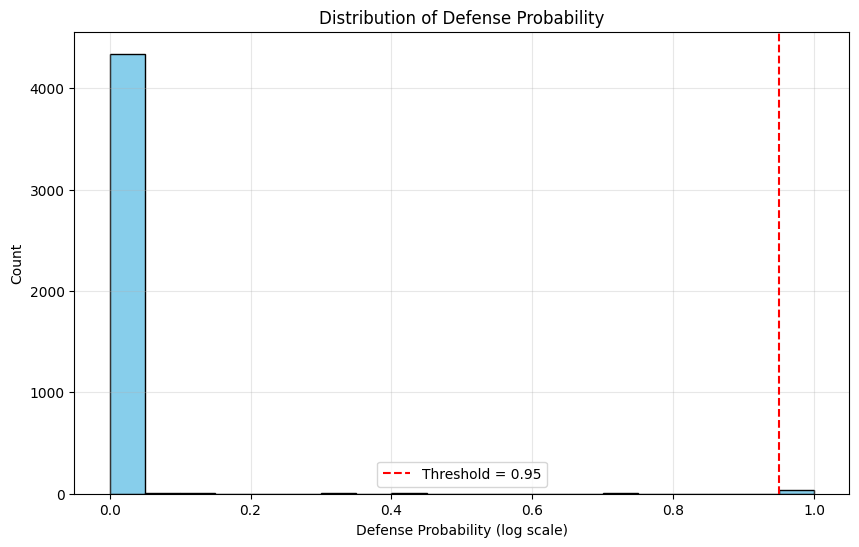

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_1['defense_probability'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 0.95')
plt.xlabel('Defense Probability (log scale)')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

–í–∏–¥–∏–º , —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–∏–µ, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞–ª—å—à–µ defense_log_odds

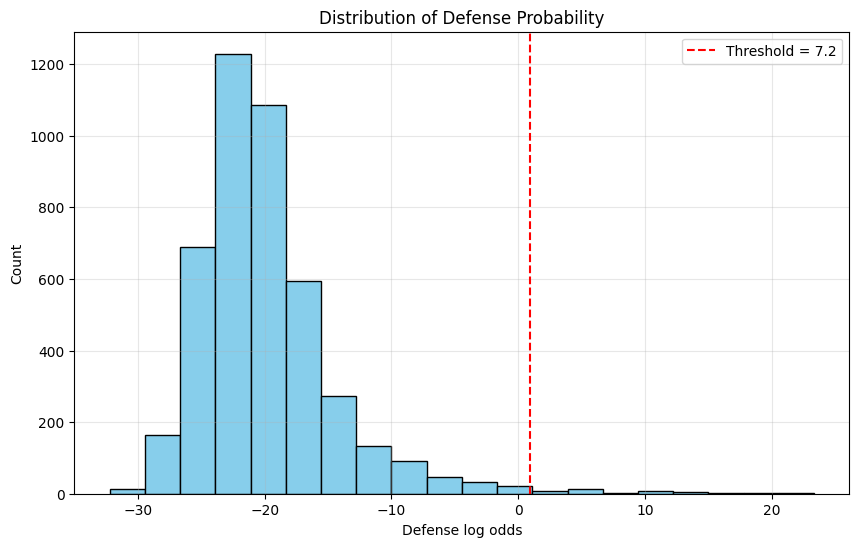

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_1['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def_pred_df=gen_1[gen_1['defense_log_odds']>7.2]
def_pred_df.count()

protein_context_id     21
product_accession      21
name                   21
symbol                  3
genomic_accession      21
start                  21
end                    21
strand                 21
dna_seq                21
protein_seq            21
defense_probability    21
defense_log_odds       21
dtype: int64

–£–±–µ—Ä–µ–º —É–∂–µ –∏–∑–≤–µ—Å–Ω—ã–µ –∑–∞—â–∏—Ç–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã, –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –º–æ–≥—É—Ç –∏–º–∏ —è–≤–ª—è—Ç—å—Å—è

In [ ]:
gen_1_hyp=gen_1[gen_1['name']=='hypothetical protein']
gen_1_hyp.count()

protein_context_id     939
product_accession      939
name                   939
symbol                   0
genomic_accession      939
start                  939
end                    939
strand                 939
dna_seq                939
protein_seq            939
defense_probability    939
defense_log_odds       939
dtype: int64

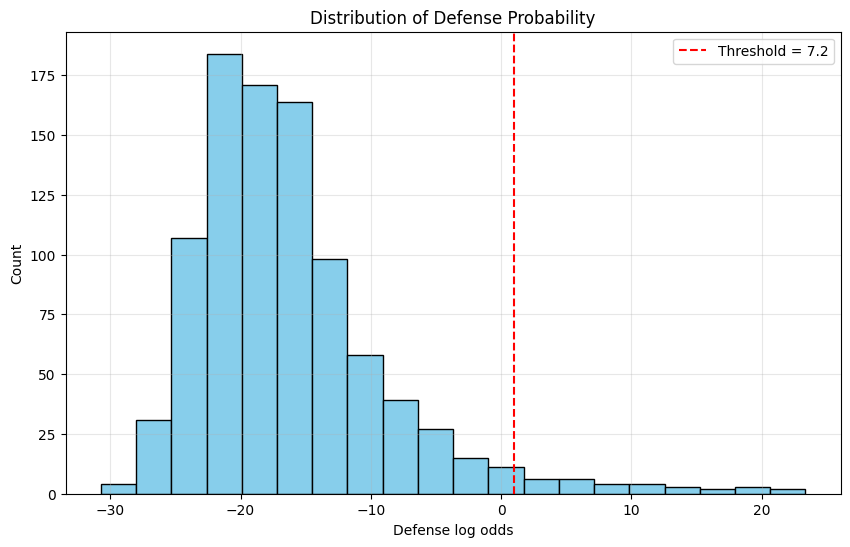

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_1_hyp['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

–ü–æ—Å—á–∏—Ç–∞–µ–º , —Å–∫–æ–ª—å–∫–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –Ω–æ–≤—ã—Ö –∑–∞—â–∏—Ç–Ω—ã—Ö —Å–∏—Å—Ç–µ–º —É–¥–∞–ª–æ—Å—å –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å —Å –ø–æ–º–æ—â—å—é defense predictor

In [ ]:
def_pred_df_hyp=gen_1_hyp[gen_1_hyp['defense_log_odds']>7.2]
def_pred_df_hyp.count()

protein_context_id     18
product_accession      18
name                   18
symbol                  0
genomic_accession      18
start                  18
end                    18
strand                 18
dna_seq                18
protein_seq            18
defense_probability    18
defense_log_odds       18
dtype: int64

#2

In [ ]:
gen_2=pd.read_csv('/content/GCF_003334815.1.csv')
gen_2.head()

protein_context_id product_accession  \
0     LMADKNAO_00001|gnl|Prokka|LMADKNAO_1|7|+    LMADKNAO_00001   
1   LMADKNAO_00002|gnl|Prokka|LMADKNAO_1|804|+    LMADKNAO_00002   
2   LMADKNAO_00003|gnl|Prokka|LMADKNAO_2|646|-    LMADKNAO_00003   
3  LMADKNAO_00004|gnl|Prokka|LMADKNAO_2|1047|-    LMADKNAO_00004   
4    LMADKNAO_00005|gnl|Prokka|LMADKNAO_3|32|-    LMADKNAO_00005   

                              name symbol      genomic_accession  start   end  \
0                     Protein RhsC   rhsC  gnl|Prokka|LMADKNAO_1      7   804   
1             hypothetical protein    NaN  gnl|Prokka|LMADKNAO_1    804  1130   
2             hypothetical protein    NaN  gnl|Prokka|LMADKNAO_2    646   888   
3             hypothetical protein    NaN  gnl|Prokka|LMADKNAO_2   1047  1208   
4  Cytoskeleton-binding toxin CbtA   cbtA  gnl|Prokka|LMADKNAO_3     32   406   

  strand                                            dna_seq  \
0      +  ATGGACCCGGTGTACACGCCGGCGCGAAAAATCCACCTGTACCACT...   
1      +  ATGAAATATATTATTTTTTTATTCAGAGCTATATGGCTGGCTTTAT...   
2      -  ATGGGATATATCACATATGTTACAGATCAACGACCCGGTGAACCAG...   
3      -  ATGCTGATGAAACAGTTAGGGCAAATCAATGATGAACTGGGGGCGC...   
4      -  ATGAAAACATTACCCGACACGCATGTACGGGAGGTATCGTGCTGCC...   

                                         protein_seq  defense_probability  \
0  MDPVYTPARKIHLYHCDHRGLPLALVSTEGATEWCAEYDEWGNLLN...         3.320851e-10   
1  MKYIIFLFRAIWLALSLLILFFSMHRLSLLDSTRDVSELISLMSYG...         1.583043e-06   
2  MGYITYVTDQRPGEPDILTGNTFADLEIRDSDGHLLLKVSAPEAGW...         8.247251e-10   
3  MLMKQLGQINDELGALLDSVENHTPVIRKKASDLSALMMLFSQQAG...         8.474683e-09   
4  MKTLPDTHVREVSCCPSPVTIWQTLLSRLLGQHYSLTLNDTPFVDE...         1.116490e-07   

   defense_log_odds  
0        -21.825630  
1        -13.356160  
2        -20.915971  
3        -18.586183  
4        -16.007906

In [ ]:
gen_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   protein_context_id   4634 non-null   object 
 1   product_accession    4634 non-null   object 
 2   name                 4634 non-null   object 
 3   symbol               3483 non-null   object 
 4   genomic_accession    4634 non-null   object 
 5   start                4634 non-null   int64  
 6   end                  4634 non-null   int64  
 7   strand               4634 non-null   object 
 8   dna_seq              4634 non-null   object 
 9   protein_seq          4634 non-null   object 
 10  defense_probability  4634 non-null   float64
 11  defense_log_odds     4634 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 434.6+ KB


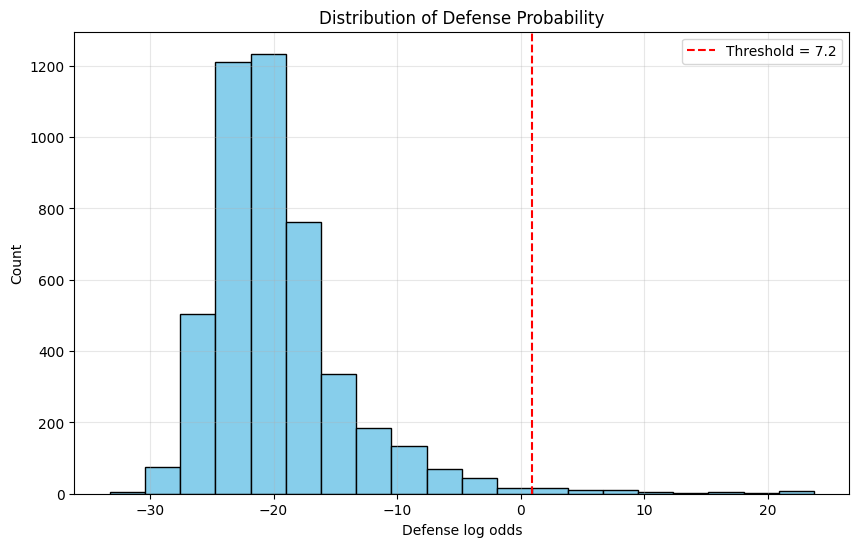

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_2['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def_pred_df_2=gen_2[gen_2['defense_log_odds']>7.2]
def_pred_df_2.count()

protein_context_id     27
product_accession      27
name                   27
symbol                 10
genomic_accession      27
start                  27
end                    27
strand                 27
dna_seq                27
protein_seq            27
defense_probability    27
defense_log_odds       27
dtype: int64

In [ ]:
gen_2_hyp=gen_2[gen_2['name']=='hypothetical protein']
gen_2_hyp.count()

protein_context_id     1075
product_accession      1075
name                   1075
symbol                    0
genomic_accession      1075
start                  1075
end                    1075
strand                 1075
dna_seq                1075
protein_seq            1075
defense_probability    1075
defense_log_odds       1075
dtype: int64

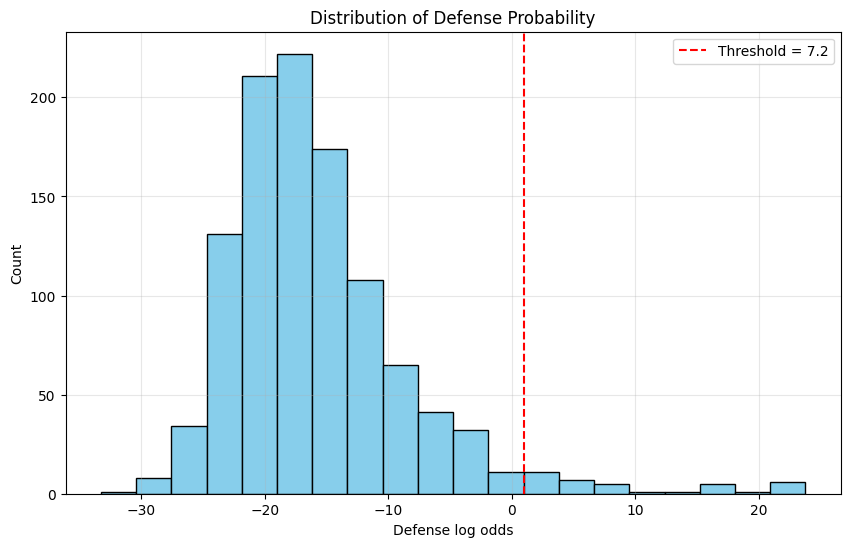

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_2_hyp['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def_pred_df_hyp_2=gen_2_hyp[gen_2_hyp['defense_log_odds']>7.2]
def_pred_df_hyp_2.count()

protein_context_id     17
product_accession      17
name                   17
symbol                  0
genomic_accession      17
start                  17
end                    17
strand                 17
dna_seq                17
protein_seq            17
defense_probability    17
defense_log_odds       17
dtype: int64

#3

In [ ]:
gen_3=pd.read_csv('/content/GCF_003334785.1.csv')
gen_3.head()

protein_context_id product_accession  \
0   LJAKIAKM_00001|gnl|Prokka|LJAKIAKM_2|433|-    LJAKIAKM_00001   
1   LJAKIAKM_00002|gnl|Prokka|LJAKIAKM_2|840|-    LJAKIAKM_00002   
2  LJAKIAKM_00003|gnl|Prokka|LJAKIAKM_2|1643|-    LJAKIAKM_00003   
3  LJAKIAKM_00004|gnl|Prokka|LJAKIAKM_2|2407|-    LJAKIAKM_00004   
4  LJAKIAKM_00005|gnl|Prokka|LJAKIAKM_2|3237|-    LJAKIAKM_00005   

                                            name symbol  \
0                    Nickel-responsive regulator   nikR   
1         Nickel import ATP-binding protein NikE   nikE   
2         Nickel import ATP-binding protein NikD   nikD   
3  Nickel transport system permease protein NikC   nikC   
4  Nickel transport system permease protein NikB   nikB   

       genomic_accession  start   end strand  \
0  gnl|Prokka|LJAKIAKM_2    433   834      -   
1  gnl|Prokka|LJAKIAKM_2    840  1646      -   
2  gnl|Prokka|LJAKIAKM_2   1643  2407      -   
3  gnl|Prokka|LJAKIAKM_2   2407  3240      -   
4  gnl|Prokka|LJAKIAKM_2   3237  4181      -   

                                             dna_seq  \
0  ATGCAACGAGTCACCATCACGCTTGATGACGATTTACTGGAGACGC...   
1  ATGACTTTACTTAACATCTCCGGCCTTTCCCATCACTATGCGCACG...   
2  ATGCCGCAACAGATTGAACTACGTAATATCGCGCTACAGGCCGCGC...   
3  GTGAACTTTTTCCTCTCTTCCCGCTGGTCGGTACGCCTGGCGCTGA...   
4  ATGTTGCGTTACGTATTACGCCGCTTTCTGCTGCTGATCCCGATGG...   

                                         protein_seq  defense_probability  \
0  MQRVTITLDDDLLETLDSLSQRRGYNNRSEAIRDILRSALAQEATQ...         5.946904e-09   
1  MTLLNISGLSHHYAHGGFNGKHQHQAVLNNVSLTLKSGETVALLGR...         1.780072e-08   
2  MPQQIELRNIALQAAQPLVHGVSLTLQRGRVLALVGGSGSGKSLTC...         2.480791e-10   
3  MNFFLSSRWSVRLALIIIALLALIALTSQWWLPYDPQAIDLPSRLL...         5.183304e-12   
4  MLRYVLRRFLLLIPMVLAASVIIFLMLRLGTGDPALDYLRLSNLPP...         5.012178e-11   

   defense_log_odds  
0        -18.940395  
1        -17.844027  
2        -22.117273  
3        -25.985578  
4        -23.716565

In [ ]:
gen_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   protein_context_id   4399 non-null   object 
 1   product_accession    4399 non-null   object 
 2   name                 4399 non-null   object 
 3   symbol               3436 non-null   object 
 4   genomic_accession    4399 non-null   object 
 5   start                4399 non-null   int64  
 6   end                  4399 non-null   int64  
 7   strand               4399 non-null   object 
 8   dna_seq              4399 non-null   object 
 9   protein_seq          4399 non-null   object 
 10  defense_probability  4399 non-null   float64
 11  defense_log_odds     4399 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 412.5+ KB


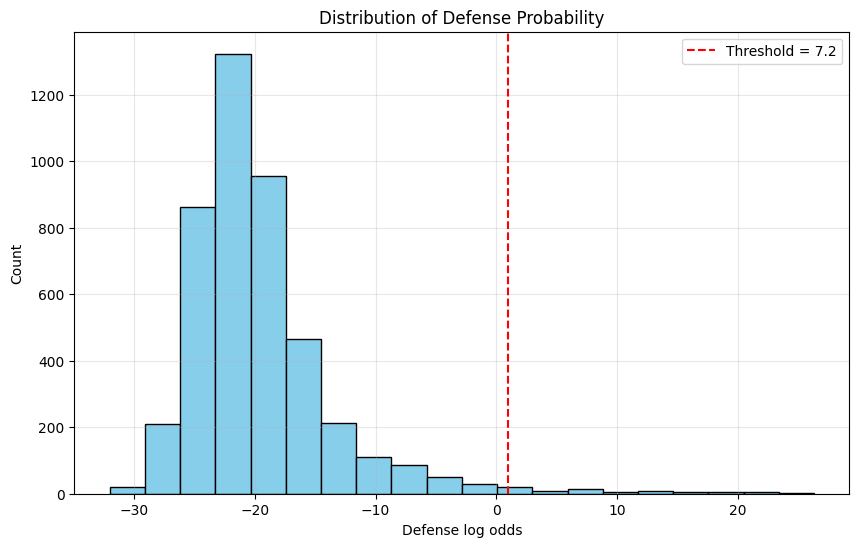

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_3['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def_pred_df_3=gen_3[gen_3['defense_log_odds']>7.2]
def_pred_df_3.count()

protein_context_id     41
product_accession      41
name                   41
symbol                 16
genomic_accession      41
start                  41
end                    41
strand                 41
dna_seq                41
protein_seq            41
defense_probability    41
defense_log_odds       41
dtype: int64

In [ ]:
gen_3_hyp=gen_3[gen_3['name']=='hypothetical protein']
gen_3_hyp.count()

protein_context_id     882
product_accession      882
name                   882
symbol                   0
genomic_accession      882
start                  882
end                    882
strand                 882
dna_seq                882
protein_seq            882
defense_probability    882
defense_log_odds       882
dtype: int64

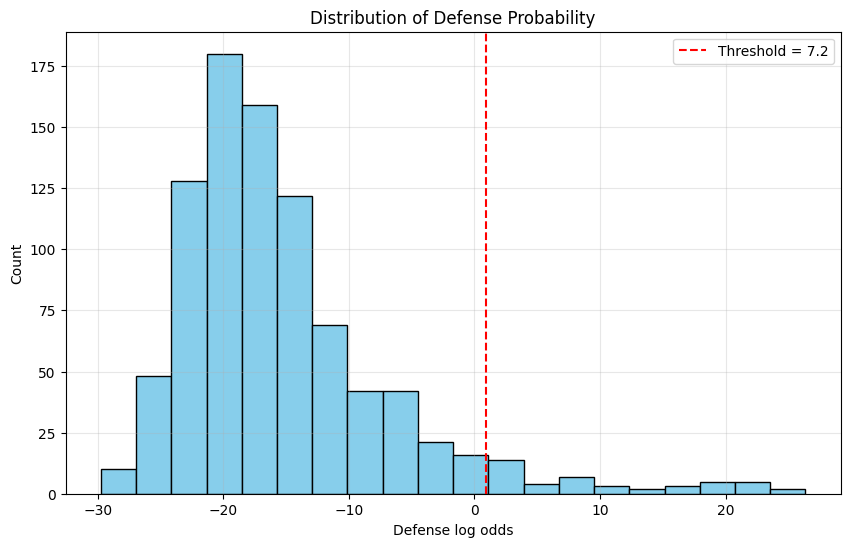

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(gen_3_hyp['defense_log_odds'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold = 7.2')
plt.xlabel('Defense log odds')
plt.ylabel('Count')
plt.title('Distribution of Defense Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
def_pred_df_hyp_3=gen_3_hyp[gen_3_hyp['defense_log_odds']>7.2]
def_pred_df_hyp_3.count()

protein_context_id     25
product_accession      25
name                   25
symbol                  0
genomic_accession      25
start                  25
end                    25
strand                 25
dna_seq                25
protein_seq            25
defense_probability    25
defense_log_odds       25
dtype: int64

#Defense finder

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -c bioconda defense-finder hmmer macsyfinder -y

‚ú®üç∞‚ú® Everything looks OK!

Looking for: ['defense-finder', 'hmmer', 'macsyfinder']

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  - python_abi 3.11.* *cp311*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



In [ ]:
!defense-finder update

Extracting defense-finder-models (2.0.2).
Installing defense-finder-models (2.0.2) in /root/.macsyfinder/models
Cleaning.
The models defense-finder-models (2.0.2) have been installed successfully.
Extracting CasFinder (3.1.0).
Extracting CasFinder (3.1.0).
Installing CasFinder (3.1.0) in /root/.macsyfinder/models
Installing CasFinder (3.1.0) in /root/.macsyfinder/models
Cleaning.
Cleaning.
The models CasFinder (3.1.0) have been installed successfully.
The models CasFinder (3.1.0) have been installed successfully.


In [ ]:
!mkdir -p results/defense_finder_results

In [ ]:
!defense-finder run \
    --out-dir results/defense_finder_results \
    --workers 2 \
    --coverage 0.4 \
    --db-type ordered_replicon \
    /content/GCF_003335465.1_ASM333546v1_genomic.fna

 2025-07-17 08:50:18 | INFO     | Received file /content/GCF_003335465.1_ASM333546v1_genomic.fna
 2025-07-17 08:50:18 | WARNING  | Out directory /content/results/defense_finder_results already exists. Existing DefenseFinder output will be overwritten
 2025-07-17 08:50:18 | INFO     | /content/GCF_003335465.1_ASM333546v1_genomic.fna is a nucleotide fasta file. Prodigal will annotate the CDS
 2025-07-17 08:50:27 | INFO     | Prodigal annotated 84 replicons
 2025-07-17 08:50:28 | INFO     | Protein files written in /content/results/defense_finder_results/GCF_003335465.1_ASM333546v1_genomic.prt
 2025-07-17 08:50:28 | INFO     | 4475 CDS were annotated
 2025-07-17 08:50:28 | INFO     | Awesome, you are using the last version of the defense-finder-models : 2.0.2
 2025-07-17 08:50:28 | INFO     | Running DefenseFinder version 2.0.1
 2025-07-17 08:50:28 | INFO     | Using the following models:

/root/.macsyfinder/models/CasFinder	3.1.0
/root/.macsyfinder/models/defense-finder-models	2.0.2

 20

Columns in hmmer.tsv: ['hit_id', 'replicon', 'hit_pos', 'hit_sequence_length', 'gene_name', 'i_eval', 'hit_score', 'hit_profile_cov', 'hit_seq_cov', 'hit_begin_match', 'hit_end_match']
                  hit_id           replicon  hit_pos  hit_sequence_length  \
0  NZ_QOZF01000010.1_111  NZ_QOZF01000010.1      112                  929   
1   NZ_QOZF01000011.1_22  NZ_QOZF01000011.1      141                 1487   
2   NZ_QOZF01000011.1_53  NZ_QOZF01000011.1      172                  685   
3   NZ_QOZF01000011.1_53  NZ_QOZF01000011.1      172                  685   
4  NZ_QOZF01000011.1_118  NZ_QOZF01000011.1      237                  178   

          gene_name        i_eval  hit_score  hit_profile_cov  hit_seq_cov  \
0      UG9__DNA_pol  3.900000e-37      126.3            0.715        0.422   
1  Wadjet__JetC_III  1.600000e-12       43.7            0.452        0.445   
2    Gabija__GajB_3  5.500000e-16       56.7            0.593        0.349   
3    Gabija__GajB_2  2.400000e-66      2

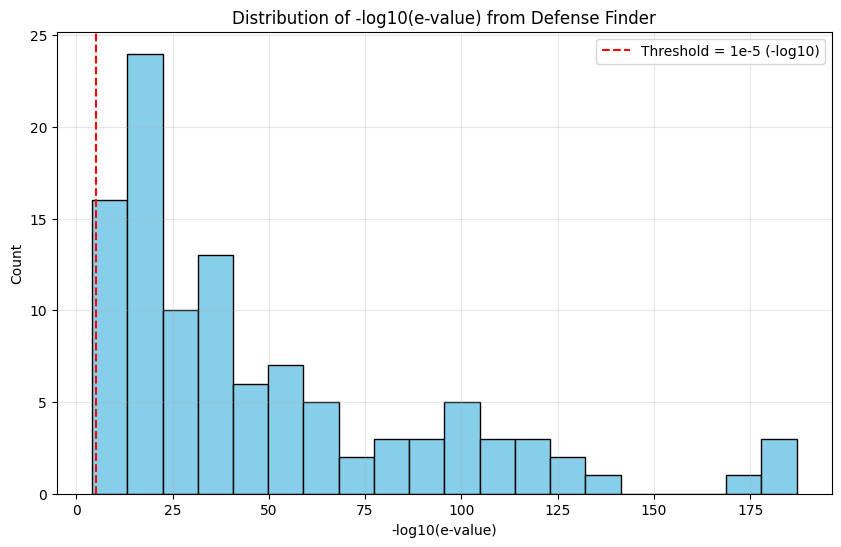

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hmmer_file = "/content/results/defense_finder_results/GCF_003335465.1_ASM333546v1_genomic_defense_finder_hmmer.tsv"
df_hmmer = pd.read_csv(hmmer_file, sep='\t')

print("Columns in hmmer.tsv:", df_hmmer.columns.tolist())
print(df_hmmer.head())

e_values = df_hmmer['i_eval'].dropna().astype(float)


min_e_value = e_values[e_values > 0].min()
e_values = e_values.replace(0, min_e_value)
log_e_values = -np.log10(e_values)

log_e_values = log_e_values[np.isfinite(log_e_values)]

plt.figure(figsize=(10, 6))
plt.hist(log_e_values, bins=20, edgecolor='black', color='skyblue')
plt.axvline(x=-np.log10(1e-5), color='red', linestyle='--', label='Threshold = 1e-5 (-log10)')
plt.xlabel('-log10(e-value)')
plt.ylabel('Count')
plt.title('Distribution of -log10(e-value) from Defense Finder')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

PADLOC

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -c conda-forge -c bioconda -c padlocbio padloc=2.0.0 hmmer -y

!padloc --db-update

‚ú®üç∞‚ú® Everything looks OK!

Looking for: ['padloc=2.0.0', 'hmmer']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache
bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
warning  libmamba Could not parse mod/etag header
[+] 0.0s
[+] 0.1s
padlocbio/linux-64..  ‚£æ  [+] 0.2s
padlocbio/linux-64..  ‚£æ  padlocbio/linux-64 (check zst)                    
warning  libmamba Could not parse mod/etag header
[+] 0.0s
padlocbio/noarch (..  ‚£æ  padlocbio/noarch (check zst)                      
[+] 0.0s
padlocbio/linux-64  ‚£æ  [+] 0.1s
padlocbio/linux-64  ‚£æ  
padlocbio/noarch    ‚£æ  padlocbio/noarch                                  
[+] 0.2s
padlocbio/linux-64  ‚£æ  [+] 0.3s
padlocbio/linux-64  ‚£æ  padlocbio/linux-64                                

Pinned packages:
  - python 3.11.*
  - python 3.11.*
  

In [ ]:
!mkdir -p /content/results/padloc_output

!padloc --fna /content/GCF_003335465.1_ASM333546v1_genomic.fna --outdir /content/results/padloc_output --cpu 4

[09:10:36] >> Predicting protein-coding genes with prodigal
[09:10:47] >> Scanning GCF_003335465.1_ASM333546v1_genomic for defence system proteins
[09:15:05] >> Searching GCF_003335465.1_ASM333546v1_genomic for defence systems
Warning messages:
1: package ‚Äòtidyverse‚Äô was built under R version 4.3.3 
2: package ‚Äòggplot2‚Äô was built under R version 4.3.3 
3: package ‚Äòtibble‚Äô was built under R version 4.3.3 
4: package ‚Äòtidyr‚Äô was built under R version 4.3.3 
5: package ‚Äòreadr‚Äô was built under R version 4.3.3 
6: package ‚Äòpurrr‚Äô was built under R version 4.3.3 
7: package ‚Äòdplyr‚Äô was built under R version 4.3.3 
8: package ‚Äòstringr‚Äô was built under R version 4.3.3 
9: package ‚Äòforcats‚Äô was built under R version 4.3.3 
10: package ‚Äòlubridate‚Äô was built under R version 4.3.3 
[09:16:27 AM] >> Writing output to '/content/results/padloc_output/GCF_003335465.1_ASM333546v1_genomic_padloc.csv'


In [ ]:
padloc=pd.read_csv('/content/results/padloc_output/GCF_003335465.1_ASM333546v1_genomic_padloc.csv')
padloc.head()

system.number              seqid        system            target.name  \
0              1  NZ_QOZF01000009.1       PDC-S02  NZ_QOZF01000009.1_247   
1              2  NZ_QOZF01000015.1  gop_beta_cll  NZ_QOZF01000015.1_153   
2              2  NZ_QOZF01000015.1  gop_beta_cll  NZ_QOZF01000015.1_154   
3              2  NZ_QOZF01000015.1  gop_beta_cll  NZ_QOZF01000015.1_155   
4              3  NZ_QOZF01000019.1       PDC-S04   NZ_QOZF01000019.1_61   

  hmm.accession                hmm.name protein.name  full.seq.E.value  \
0     PDLC04807  PDC-S02_WP_151674975.1      PDC-S02     1.800000e-136   
1     PDLC02989                    cll2          cll     2.900000e-113   
2     PDLC02985                   beta2         beta     7.300000e-188   
3     PDLC03001                gop_ncbi          gop      3.900000e-70   
4     PDLC04838  PDC-S04_WP_169250289.1      PDC-S04      5.800000e-75   

   domain.iE.value  target.coverage  hmm.coverage   start     end strand  \
0    2.500000e-136            0.963         0.954  264084  265211      +   
1    3.200000e-113            0.989         0.989  167437  168231      +   
2    8.200000e-188            0.992         0.994  168259  169326      -   
3     4.700000e-70            0.985         0.992  169329  169730      -   
4     6.400000e-75            0.970         0.938   67554   68156      +   

  target.description  relative.position  contig.end  \
0                  -                247         304   
1                  -                153         164   
2                  -                154         164   
3                  -                155         164   
4                  -                 61          84   

                                         all.domains  \
0  PDLC04795,PDC-S02_WP_011937941.1, 1, 1.2e-89, ...   
1          PDLC02989,cll2, 1, 3.2e-113, 0.989, 0.989   
2         PDLC02985,beta2, 1, 8.2e-188, 0.992, 0.994   
3       PDLC03001,gop_ncbi, 1, 4.7e-70, 0.985, 0.992   
4  PDLC04838,PDC-S04_WP_169250289.1, 1, 6.4e-75, ...   

                                           best.hits  
0  PDLC04807, PDC-S02_WP_151674975.1, 2.5e-136, 0...  
1            PDLC02989, cll2, 3.2e-113, 0.989, 0.989  
2           PDLC02985, beta2, 8.2e-188, 0.992, 0.994  
3         PDLC03001, gop_ncbi, 4.7e-70, 0.985, 0.992  
4  PDLC04838, PDC-S04_WP_169250289.1, 6.4e-75, 0....

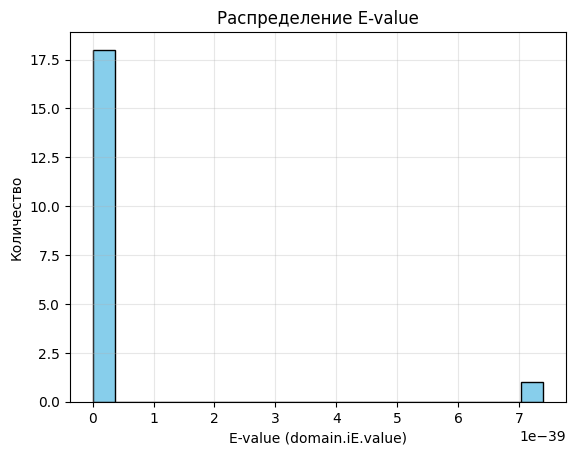

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.hist(padloc['domain.iE.value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('E-value (domain.iE.value)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ E-value')
plt.grid(True, alpha=0.3)
plt.show()